In [66]:
import torch, torchvision
from torch import nn, optim
import numpy as np

In [37]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data) #data type is automatically inferred
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [38]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array) #create tensor from np.array

In [39]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data, all ones
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data, all random floats
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6369, 0.3093],
        [0.2110, 0.4775]]) 



In [40]:
shape = (2,3,) #tuple of tensor dimensions, determines dimensionality of tensor output
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9860, 0.6614, 0.5134],
        [0.2961, 0.4889, 0.6662]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [41]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [42]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [43]:
tensor = torch.ones(4,4) 
tensor[:,1] = 0             #slice column 1
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [44]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)   #concatenate tensors along a given dimension (1=column)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [45]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [46]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [47]:
print(tensor, "\n")
tensor.add_(5) #_ suffix are in-place operations, this one adds 5 to each element
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [48]:
t = torch.ones(5) 
print(f"t: {t}")
n = t.numpy()    #same memory location
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [49]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}") #change in tensor reflects change in numpy array, and vice versa

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [50]:
#AUTOGRAD INTRO

In [52]:
model = torchvision.models.resnet18(pretrained=True)  #pretrained resnet18 model
data = torch.rand(1,3,64,64) #random tensor of a single image with 3 channels, dimensions 64x64
labels=torch.rand(1,1000) #initialised random labels

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/u6676643/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [54]:
#neural network
prediction = model(data) #forward pass
                         #computes resulting tensor, maintains operation's gradient function
loss = (prediction - labels).sum()  #loss calculation
loss.backward() #backward pass  
                #computes gradients, accumulates them in .grad attribute, uses chain rule to propagate to leaf tensors
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9) #optimizer (SGD) with a learning rate of 0.01 and 
                                                                   #momentum 0.9, register all parameters
optim.step() #gradient descent adjusts all parameters from the gradient

In [63]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True) #signals to autograd that all operations should be tracked
                                               #otherwise it is not part of DAG
#DAG = directed acyclic graph, leaves are input tnesors and roots are output tensors

In [64]:
Q = 3*a**3 - b**2 #new tensor
external_grad = torch.tensor([1., 1.]) #vector for the vector-Jacobian product
Q.backward(gradient=external_grad) #need to explicitly pass this gradient argument since it's a vector
print(9*a**2 == a.grad)
print(-2*b == b.grad) #check gradients are correct and collected

tensor([True, True])
tensor([True, True])


In [67]:
for param in model.parameters():
    param.requires_grad = False  #freezes parameters that aren't required for your parameter, reduces computation
model.fc = nn.Linear(512, 10)    #now these parameters are not frozen
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)  #optimise only the weights/bias of the classifier

In [68]:
#NEURAL NETWORKS

In [69]:
import torch.nn as nn
import torch.nn.functional as F

In [70]:
#1. define neural network and its learnable parameters / weights
#backward function is automatically defined through autograd
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [71]:
params = list(net.parameters())   #learnable parameters
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [72]:
#2. process input through network
input = torch.randn(1, 1, 32, 32) #random 32x32 input
out = net(input) #apply net to input
print(out)

tensor([[ 0.0702,  0.0396, -0.0436, -0.1346,  0.0634, -0.0644, -0.0850,  0.0523,
          0.0843, -0.0284]], grad_fn=<AddmmBackward>)


In [73]:
net.zero_grad() #zero the gradient buffers of all parametersand backprops with random gradients
out.backward(torch.randn(1, 10))

In [74]:
#3. loss function
output = net(input)
target = torch.randn(10)  #a dummy target, for example
target = target.view(1, -1)  #make it the same shape as output
criterion = nn.MSELoss()    #mean square error between output and target

loss = criterion(output, target)
print(loss)

tensor(0.7560, grad_fn=<MseLossBackward>)


In [75]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [77]:
#4. backpropagate
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-4.0858e-03,  8.9923e-03,  7.2406e-03, -3.8819e-04,  8.5468e-03,
         2.6558e-05])


In [78]:
#5. update weights
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)   #stochastic gradient descent (SGD)

In [79]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [80]:
#TRAINING A CLASSIFIER

In [81]:
#1. load and normalise CIFAR10 training and test datasets
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


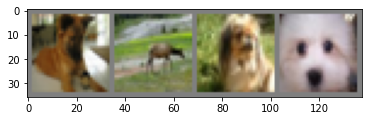

  dog  deer   dog   dog


In [82]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [83]:
#2. define a convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [84]:
#3. define a loss function and optimiser
#classification cross-entropy loss and SGD with momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [85]:
#4. train the network
#loop over data iterator, feed inputs into network and optimise
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.248
[1,  4000] loss: 1.972
[1,  6000] loss: 1.723
[1,  8000] loss: 1.606
[1, 10000] loss: 1.549
[1, 12000] loss: 1.507
[2,  2000] loss: 1.425
[2,  4000] loss: 1.401
[2,  6000] loss: 1.400
[2,  8000] loss: 1.338
[2, 10000] loss: 1.308
[2, 12000] loss: 1.290
Finished Training


In [86]:
#save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

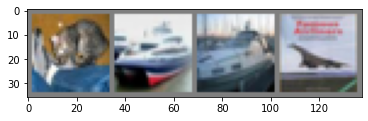

GroundTruth:    cat  ship  ship plane


In [87]:
#5. test on test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [89]:
net = Net()
net.load_state_dict(torch.load(PATH)) #load saved model
outputs = net(images) #apply network to test set to get energies for the 10 classes
_, predicted = torch.max(outputs, 1) 

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4))) #print index of highest energy (aka most likely class)


Predicted:    cat  ship   car plane


In [90]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [91]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 76 %
Accuracy of  bird : 35 %
Accuracy of   cat : 37 %
Accuracy of  deer : 31 %
Accuracy of   dog : 43 %
Accuracy of  frog : 75 %
Accuracy of horse : 63 %
Accuracy of  ship : 62 %
Accuracy of truck : 60 %


In [92]:
#training on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [93]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

ModuleNotFoundError: No module named 'rdkit'